In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

In [2]:
math = pd.read_csv('stud_math.csv')

**Описание датасета**

1 school — аббревиатура школы, в которой учится ученик<br/>
2 sex — пол ученика ('F' - женский, 'M' - мужской)<br/>
3 age — возраст ученика (от 15 до 22)<br/>
4 address — тип адреса ученика ('U' - городской, 'R' - за городом)<br/>
5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)<br/>
6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)<br/>
7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)<br/>
8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)<br/>
9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)<br/>
10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)<br/>
11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)<br/>
12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)<br/>
13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)<br/>
14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)<br/>
15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)<br/>
16 schoolsup — дополнительная образовательная поддержка (yes или no)<br/>
17 famsup — семейная образовательная поддержка (yes или no)<br/>
18 paid — дополнительные платные занятия по математике (yes или no)<br/>
19 activities — дополнительные внеучебные занятия (yes или no)<br/>
20 nursery — посещал детский сад (yes или no)<br/>
21 higher — хочет получить высшее образование (yes или no)<br/>
22 internet — наличие интернета дома (yes или no)<br/>
23 romantic — в романтических отношениях (yes или no)<br/>
24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)<br/>
25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)<br/>
26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)<br/>
27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)<br/>
28 absences — количество пропущенных занятий<br/>
29 score — баллы по госэкзамену по математике<br/>

In [3]:
len(math)

395

In [4]:
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

* Набор данных невелик - всего 395 строк
* Признаки примерно 50 на 50 строковые и числовые
* Многие столбцы имеют существенное количество пропусков, заполнить которые неповлияв при этом на статистику будет сложно

Посмотрим как распределена целевая пременная

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


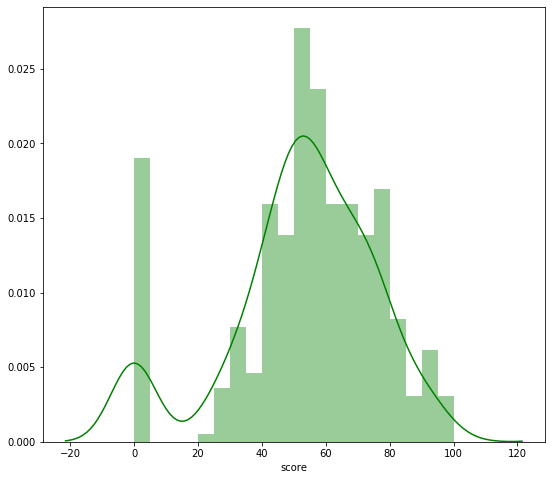

In [5]:
print(math['score'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(math['score'], color='g', bins=20)

Основная часть оценок имеет нормальное распределение.
При этом имеется существенное число учеников получивших 0 баллов, что выглядит весьма странно.
Посмотрим какое количество таких учеников:

In [6]:
len(math[math['score'] == 0])

37

Рассмотрим распределение признака для числовых переменных и устраним выбросы. Таковых только 2 - возраст (age) и количество прогулов (absences) 

In [7]:
 numeric_columns = ['age', 'absences']

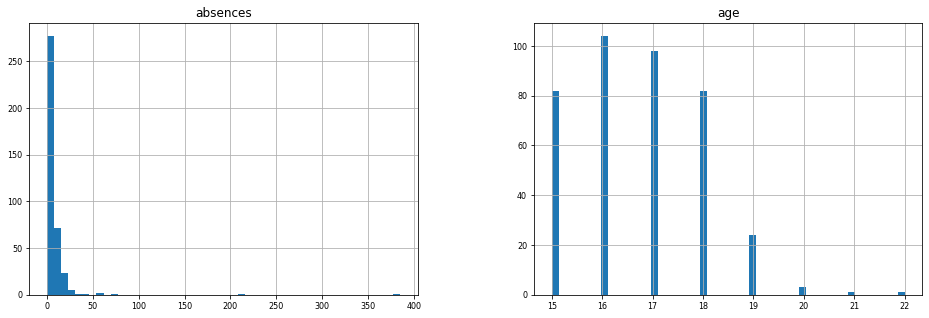

In [8]:
math[numeric_columns].hist(figsize=(16, 5), bins=50, xlabelsize=8, ylabelsize=8);

Возраст учеников рапсределен вполне ожидаемо, без выбросов. В прогулах явно присутствуют очевидные выбросы для значений больше 50.

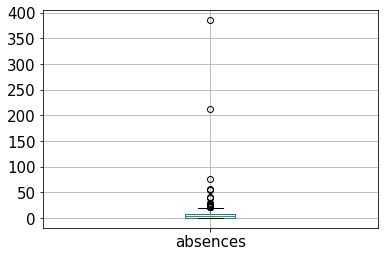

In [9]:
math['absences'].plot(kind = 'box', legend = True, grid=True, fontsize = 15)

В этом случае сложно сказать, на какое значение можно заменить явные выбросы больше 200 - приравняем их нулю.

In [10]:
math.loc[math.absences > 200, 'absences'] = 0

count    383.000000
mean       5.720627
std        8.078008
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

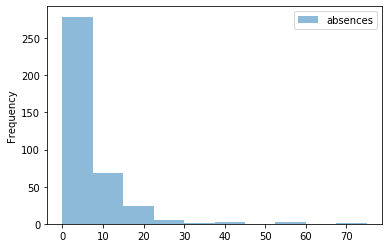

In [11]:
math['absences'].plot(kind='hist', legend=True, alpha=0.5)
math['absences'].describe()

По-прежнему остались достаточно большие значения (больше 30), которые однако могут быть вполне реальными. Посмотрим как распределена основная часть

count    377.000000
mean       5.034483
std        5.715915
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       28.000000
Name: absences, dtype: float64

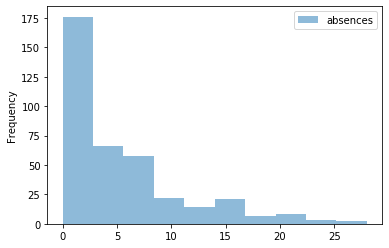

In [12]:
math['absences'][math['absences'] < 30].plot(kind='hist', legend=True, alpha=0.5)
math['absences'][math['absences'] < 30].describe()

Оставшиеся числовые переменные очевидно являются номинативными, их значения являются не более чем маркерами. оценим их распределия скопом. К ним добавим номинативные атрибуты со строковыми (но не бинарными yes/no) значениями: Mjob, Fjob, reason, guardian, sex, address, famsize, Pstatus 

In [13]:
nom_columns = ['Mjob', 'Fjob', 'reason', 'guardian', 'sex', 'address', 'famsize', 'Pstatus']

for col in nom_columns:
     #Словарь дял перевода строковых значений в численные
    nom_var = {i: m for m,i in enumerate(math[col][~math[col].isna()].unique())}
    print('{} mapping is {}'.format(col, nom_var))
    col_num = col + '_num'
    math[col_num] = math[col].map(nom_var)
    

Mjob mapping is {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}
Fjob mapping is {'teacher': 0, 'other': 1, 'health': 2, 'services': 3, 'at_home': 4}
reason mapping is {'course': 0, 'other': 1, 'home': 2, 'reputation': 3}
guardian mapping is {'mother': 0, 'father': 1, 'other': 2}
sex mapping is {'F': 0, 'M': 1}
address mapping is {'U': 0, 'R': 1}
famsize mapping is {'GT3': 0, 'LE3': 1}
Pstatus mapping is {'A': 0, 'T': 1}


Таким образом, число уникальных значений для номинативных переменных варьируется между 2 и 5.

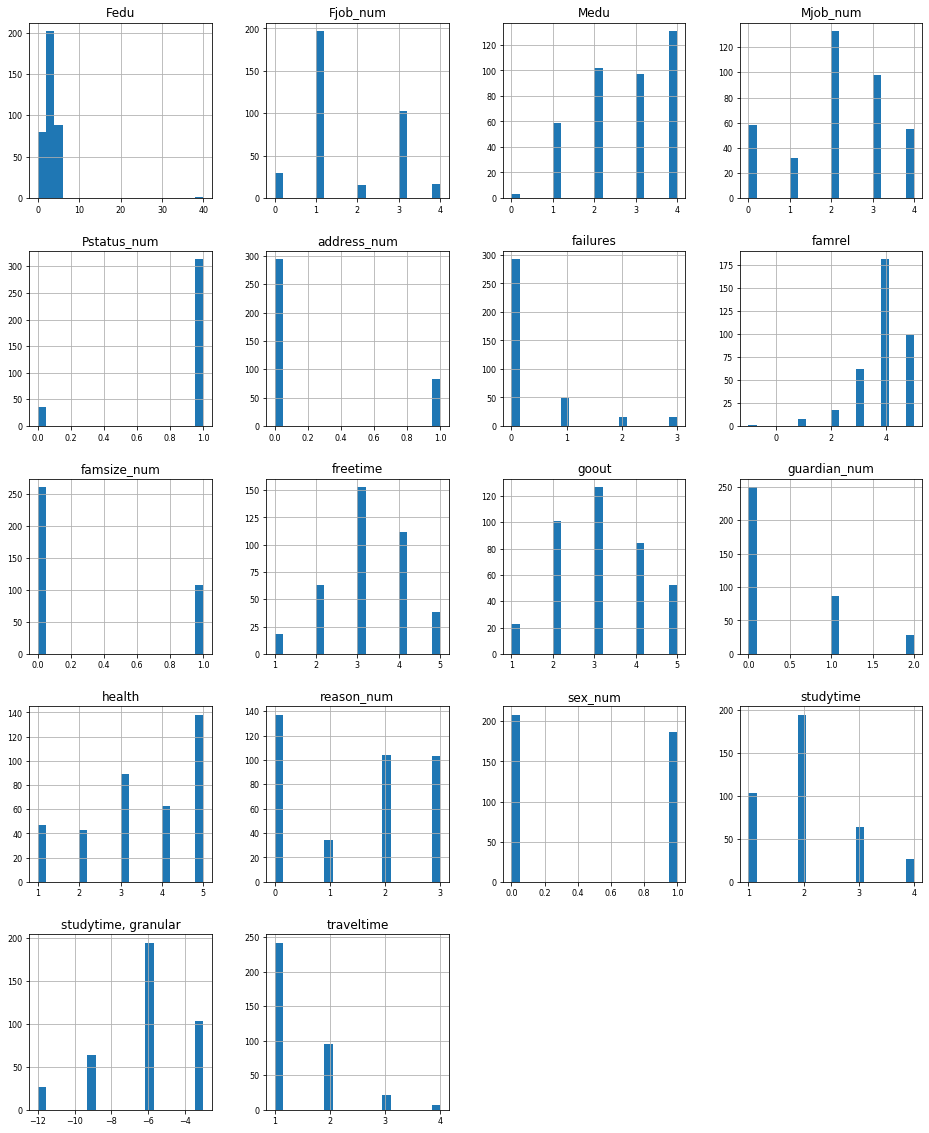

In [14]:
numeric_columns2 = [c for c in math.columns if math[c].dtypes != 'object' and c not in ['absences', 'age', 'score']]
math[numeric_columns2].hist(figsize=(16, 20), bins=20, xlabelsize=8, ylabelsize=8);

Чисто визуально, можно предположить коллинеарность признаков freetime и goout, и возможно Pstatus и address  являются антиколлинеарными. Более точный вывод сделаем позже при построении корреляционной матрицы.
Для начала устраним очевидные выбросы в признаке Fedu.

40.0    1
Name: Fedu, dtype: int64

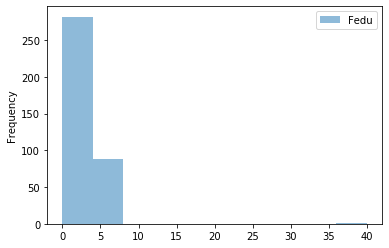

In [15]:
math['Fedu'].plot(kind='hist', legend=True, alpha=0.5)
math.Fedu[math.Fedu > 4].value_counts()

Значения 40 - это явная опечатка, заменим на 4.

In [16]:
math.loc[math.Fedu > 4, 'Fedu'] = 4

Что получилось:

count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

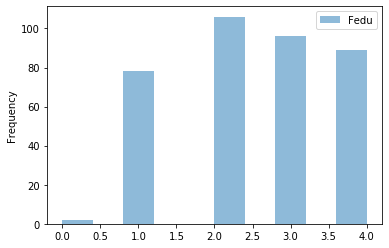

In [17]:
math['Fedu'].plot(kind='hist', legend=True, alpha=0.5)
math['Fedu'].describe()

In [18]:
# numeric_columns3 = [c for c in math.columns if math[c].dtypes != 'object']

# sns.pairplot(math[numeric_columns3], kind = 'reg')

In [19]:
# corr = math[numeric_columns3].drop('score', axis=1).corr()
# plt.figure(figsize=(12, 10))

# sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.3)], 
#             cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
#             annot=True, annot_kws={"size": 8}, square=True);

Теперь преобразуем "бинарные" номинативные переменные со значениями yes/no в соответственно 1 или 0.

In [20]:
bin_columns = ['schoolsup' , 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for col in bin_columns:
    col_num = col + '_num'
    math[col_num] = math[col].map({'no':0, 'yes':1})

Уберем лишние атрибуты

In [21]:
# school оставим на потом для Dummy переменных
object_columns = [c for c in math.columns if math[c].dtypes == 'object' and c != 'school'] 
math.drop(object_columns, axis = 1, inplace=True)

### Корреляционный анализ

In [22]:
math_num = math.drop('school', axis = 1)

Определим признаки с наибольшей корреляцией с целевой переменной

In [23]:
math_num_corr = math_num.corr()['score']
golden_features_list = math_num_corr[abs(math_num_corr) > 0.1].sort_values(ascending=False)
print("There is {} strongly correlated values with score:\n{}".format(len(golden_features_list), golden_features_list))

There is 12 strongly correlated values with score:
score                  1.000000
Medu                   0.213349
higher_num             0.185563
Fedu                   0.130923
studytime              0.115741
Mjob_num               0.101975
studytime, granular   -0.115741
address_num           -0.120067
goout                 -0.129685
romantic_num          -0.141320
age                   -0.155726
failures              -0.344338
Name: score, dtype: float64


На удивление, признаки слабо влияют на целевую переменную...
Посмотрим, как это всё выглядит на графиках

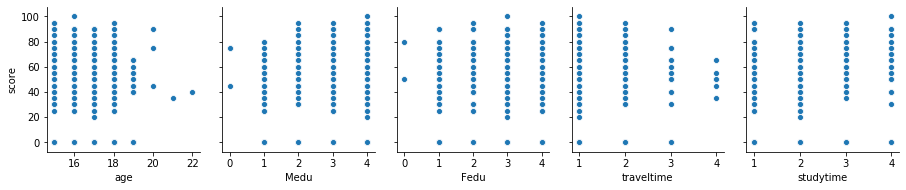

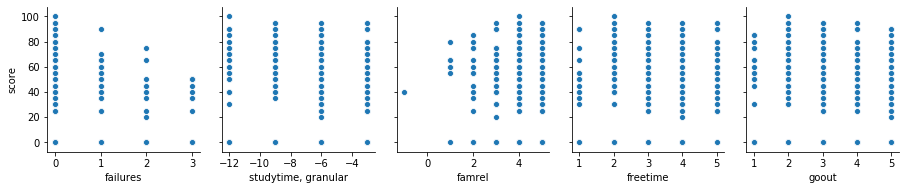

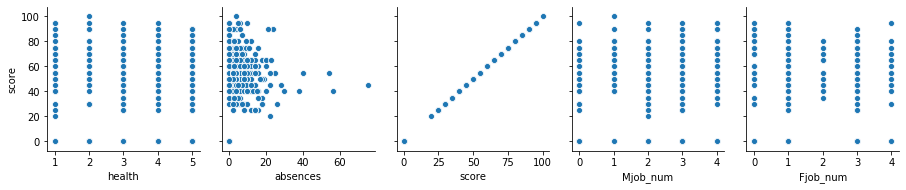

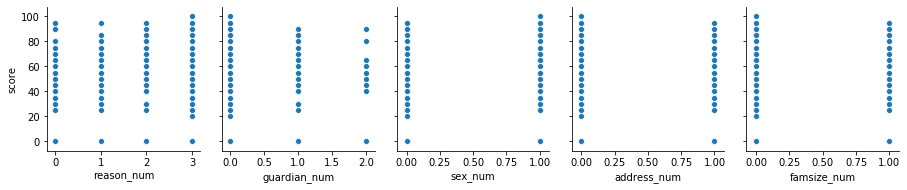

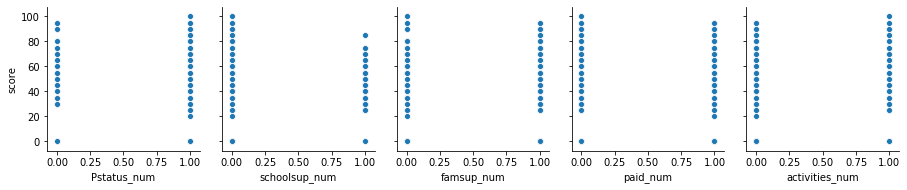

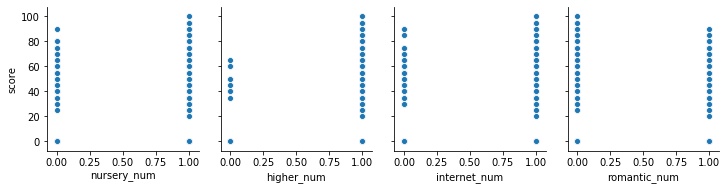

In [24]:
for i in range(0, len(math_num.columns), 5):
    sns.pairplot(data=math_num,
                x_vars=math_num.columns[i:i+5],
                y_vars=['score'])

Посмотрим как признаки скореллированы друг с другом

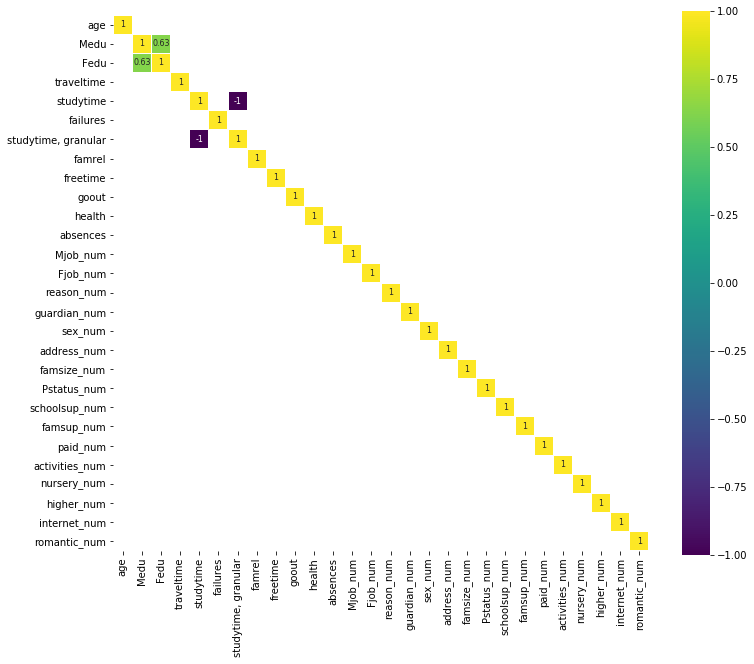

In [25]:
corr = math_num.drop('score', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], #Ограничим для быстроты и наглядности
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Собственно studytime, granular - единственный кандидат на выбывание, коэффициент корреляции 0.63 между Medu и Fedu вряд ли является достаточным основанием для исключения одного из признаков.

## Выводы

* Датасет достаточно маленький для однозначной оценки качества признаков и построения статичстических моделей.
* Качество данных при этом достаточно высоко - анализ не выявил существенных выбросов за парой исключений.
* Большая часть признаков представляют собой набор дискретных номинативных значений, в том числе дихотомические переменные, принимающие два значния - yes/no.
* Исходя из вышесказанного можно однозначно исключить линейную регрессию в качестве модели описания результатов госэкзамена по математике на основании представленных признаков.